In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("slr_train.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [36]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [86]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [46]:
data.dropna(inplace = True)

x    0
y    0
dtype: int64

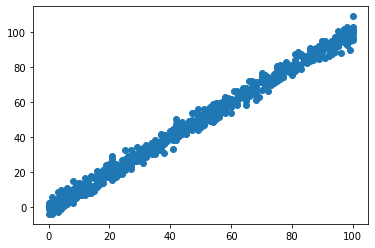

In [7]:
plt.scatter(data['x'], data['y'])

Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

In [53]:
x = np.array(data['x'], ndmin = 2).reshape(-1,1)
y = np.asarray(data['y'])
model = LinearRegression().fit(x, y)

In [66]:
print("Coefficient(bx) :", model.coef_)
print("Intercept(b0)   : %.4f" %model.intercept_)
print("R               : %.4f" %model.score(x,y))
print("R-squared       : %.4f" %model.score(x,y)**2)

Coefficient(bx) : [1.00065638]
Intercept(b0)   : -0.1073
R               : 0.9907
R-squared       : 0.9815


In [77]:
xy_test = pd.read_csv("slr_test.csv")
xy_test.dropna(inplace = True)
x_test = np.asarray(xy_test['x']).reshape(-1,1)
y_actual = np.asarray(xy_test['y'])

In [78]:
y_predicted = model.predict(x_test)

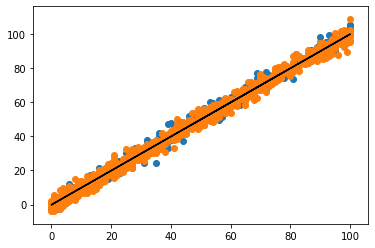

In [85]:
plt.scatter(x_test, y_actual)
plt.scatter(x, y)
plt.plot(x_test, y_predicted, color='black')